<a href="https://colab.research.google.com/github/Nisarg0705/html-portfolio/blob/main/Handwriting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('/content/vivek_b2.csv')

'''data = {
    'aX': [-0.954, -1.031, -1.046, -1.054, -0.975],
    'aY': [0.351, -0.097, -0.293, 0.680, 0.375],
    'aZ': [-0.011, -0.327, -0.246, -0.312, 0.335],
    'gX': [-59.265, -14.099, -19.653, -20.935, -30.701],
    'gY': [12.756, 1.526, 4.333, 0.549, 7.080],
    'gZ': [-0.122, 7.507, 6.287, -8.606, 2.075]
}'''
df = pd.DataFrame(data)


'''dt = 0.02  # seconds

window_size = 5  # Adjust based on your dataset; larger window for more smoothing
smoothed_ax = df['aX'].rolling(window=window_size, center=True).mean().fillna(0)
smoothed_ay = df['aY'].rolling(window=window_size, center=True).mean().fillna(0)

# Integrating smoothed acceleration to get velocity
velocity_x = np.cumsum(smoothed_ax) * dt
velocity_y = np.cumsum(smoothed_ay) * dt

# Integrating velocity to get position (assuming initial position is 0)
position_x = np.cumsum(velocity_x) * dt
position_y = np.cumsum(velocity_y) * dt

# Plotting the estimated trajectory
plt.figure(figsize=(6, 6))
plt.plot(position_x, position_y, marker='o', linestyle='-', markersize=2)
plt.title('Estimated 2D Trajectory')
plt.xlabel('X Position (arbitrary units)')
plt.ylabel('Y Position (arbitrary units)')
plt.axis('equal')
plt.grid(True)
plt.show()'''


"dt = 0.02  # seconds\n\nwindow_size = 5  # Adjust based on your dataset; larger window for more smoothing\nsmoothed_ax = df['aX'].rolling(window=window_size, center=True).mean().fillna(0)\nsmoothed_ay = df['aY'].rolling(window=window_size, center=True).mean().fillna(0)\n\n# Integrating smoothed acceleration to get velocity\nvelocity_x = np.cumsum(smoothed_ax) * dt\nvelocity_y = np.cumsum(smoothed_ay) * dt\n\n# Integrating velocity to get position (assuming initial position is 0)\nposition_x = np.cumsum(velocity_x) * dt\nposition_y = np.cumsum(velocity_y) * dt\n\n# Plotting the estimated trajectory\nplt.figure(figsize=(6, 6))\nplt.plot(position_x, position_y, marker='o', linestyle='-', markersize=2)\nplt.title('Estimated 2D Trajectory')\nplt.xlabel('X Position (arbitrary units)')\nplt.ylabel('Y Position (arbitrary units)')\nplt.axis('equal')\nplt.grid(True)\nplt.show()"

In [ ]:
len(df)

365

In [ ]:
df[:63]

,aX,aY,aZ,gX,gY,gZ
0,-0.969,-0.138,0.316,-4.517,13.794,6.226
1,-1.067,0.170,-0.372,0.122,-3.479,2.075
2,-1.031,-0.084,-0.412,-13.611,4.395,0.549
3,-0.990,-0.098,0.155,7.690,15.869,4.150
4,-1.029,0.171,-0.131,10.986,-2.441,1.709
...,...,...,...,...,...,...
58,-1.022,-0.010,-0.016,4.517,3.235,1.648
59,-1.022,-0.013,-0.016,4.395,3.235,1.770
60,NaN,NaN,NaN,NaN,NaN,NaN
61,-1.035,-0.063,-0.350,-11.169,4.150,2.686


In [ ]:
df["aY"].values

array([-0.138,  0.17 , -0.084, -0.098,  0.171,  0.179,  0.057,  0.002,
       -0.491, -0.279, -0.09 , -0.029, -0.068,  0.178, -0.201,  0.445,
        0.4  ,  0.258,  0.02 ,  0.128,  0.099, -0.139,  0.05 ,  0.148,
        0.162, -0.05 , -0.079,  0.142, -0.204, -0.244, -0.023, -0.211,
       -0.199, -0.099, -0.168, -0.234, -0.234, -0.109, -0.163,  0.136,
       -0.111,  0.094, -0.03 ,  0.082,  0.028,  0.024,  0.185,  0.029,
        0.203,  0.199,  0.205,  0.065,  0.127,  0.201,  0.026,  0.03 ,
       -0.053, -0.037, -0.01 , -0.013,    nan, -0.063, -0.133, -0.194,
       -0.504,  0.244,  0.047,  0.134,  0.136,  0.377, -0.46 ,  0.513,
       -0.08 ,  0.011,  0.057,  0.201, -0.146, -0.036,  0.34 ,  0.265,
        0.179,  0.289,  0.198,  0.036, -0.084,  0.11 , -0.149,  0.159,
       -0.156, -0.045, -0.389, -0.126, -0.276, -0.178, -0.238, -0.245,
       -0.151, -0.3  , -0.176, -0.236, -0.235, -0.141, -0.225, -0.102,
       -0.021, -0.156, -0.173,  0.006,  0.177,  0.104,  0.214,  0.19 ,
      

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer





WINDOW_SIZE=5
df=df.rolling(window=WINDOW_SIZE,min_periods=1).mean()

# To handle the nans at borders
df.ffill(inplace=True)
df.bfill(inplace=True)






#Reshaping data for KMeans
X = df["aY"].values.reshape(-1, 1)
Y = df["aZ"].values.reshape(-1, 1)
Z = df["gX"].values.reshape(-1, 1)
A = df["gY"].values.reshape(-1, 1)

# Creating the KMeans Clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
kmeans1 = KMeans(n_clusters=3)
kmeans1.fit(Y)
kmeans2 = KMeans(n_clusters=3)
kmeans2.fit(Z)
kmeans3 = KMeans(n_clusters=3)
kmeans3.fit(A)



centroids = kmeans.cluster_centers_
distance = np.min(cdist(X, centroids, "euclidean"), axis=1)
centroids1 = kmeans1.cluster_centers_
distance1 = np.min(cdist(Y, centroids1, "euclidean"), axis=1)
centroids2 = kmeans2.cluster_centers_
distance2 = np.min(cdist(Z, centroids2, "euclidean"), axis=1)
centroids3 = kmeans3.cluster_centers_
distance3 = np.min(cdist(A, centroids3, "euclidean"), axis=1)

# Defining the threshold for outliers and identifying them
threshold = np.percentile(distance, 99)
outliers = distance > threshold
threshold1 = np.percentile(distance1, 99)
outliers1 = distance1 > threshold1
threshold2 = np.percentile(distance2, 99)
outliers2 = distance2 > threshold2
threshold3 = np.percentile(distance3, 99)
outliers3 = distance3 > threshold3

# Replacing outliers with NaN
df.loc[outliers, "aY"] = np.nan
df.loc[outliers1, "aZ"] = np.nan
df.loc[outliers2, "gX"] = np.nan
df.loc[outliers3, "gY"] = np.nan


# Calculating the moving average and using it to fill NaN values
df["Moving_Average"] = df["aY"].rolling(window=10, min_periods=1).mean()
df["aY"].fillna(df["Moving_Average"], inplace=True)
df["Moving_Average1"] = df["aZ"].rolling(window=10, min_periods=1).mean()
df["aZ"].fillna(df["Moving_Average1"], inplace=True)
df["Moving_Average2"] = df["gX"].rolling(window=10, min_periods=1).mean()
df["gX"].fillna(df["Moving_Average2"], inplace=True)
df["Moving_Average3"] = df["gY"].rolling(window=10, min_periods=1).mean()
df["gY"].fillna(df["Moving_Average3"], inplace=True)

# Forward fill to handle NaN values at the start
df["aY"].fillna(method='ffill', inplace=True)
df["aZ"].fillna(method='ffill', inplace=True)
df["gX"].fillna(method='ffill', inplace=True)
df["gY"].fillna(method='ffill', inplace=True)

# Backward fill to handle NaN values at the end
df["aY"].fillna(method='bfill', inplace=True)
df["aZ"].fillna(method='bfill', inplace=True)
df["gX"].fillna(method='bfill', inplace=True)
df["gY"].fillna(method='bfill', inplace=True)

# Clean up: Remove the temporary 'Moving_Average' column if no longer needed
df.drop(columns=['Moving_Average'], inplace=True)
df.drop(columns=['Moving_Average1'], inplace=True)
df.drop(columns=['Moving_Average2'], inplace=True)
df.drop(columns=['Moving_Average3'], inplace=True)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import normalize

df["aY"] = normalize(df["aY"].values.reshape(-1, 1), axis=0)
df["aZ"] = normalize(df["aZ"].values.reshape(-1, 1), axis=0)
df["gX"] = normalize(df["gX"].values.reshape(-1, 1), axis=0)
df["gY"] = normalize(df["gY"].values.reshape(-1, 1), axis=0)



In [ ]:
pip install filterpy

In [ ]:
from filterpy.kalman import ExtendedKalmanFilter as EKF
from filterpy.common import Q_discrete_white_noise
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

def state_transition(x, dt, acc_measurements,gyro_measurements):
    """
    Predicts the next state based on the current state, time step, and gyroscope measurements.

    Parameters:
    x: Current state vector [x, y, vx, vy, roll, pitch, yaw]
    dt: Time step (duration between measurements)
    gyro_measurements: Gyroscope measurements [gx, gy, gz] representing angular velocities

    Returns:
    Predicted state vector after time step dt.
    """
    # State vector is expected to be [x, y, vx, vy, roll, pitch, yaw]
    # Checking if the state vector has the correct length...easy for debugging
    if len(x) != 7:
        raise ValueError("The state vector must be of length 7.")

    # Unpack gyro measurements
    gx, gy, gz = gyro_measurements
    ay, az = acc_measurements

    # Compute changes in orientation (roll, pitch, yaw)
    # Assuming small angles, the new angle is approximately old angle plus angular velocity times dt
    d_roll = gx * dt
    d_pitch = gy * dt
    d_yaw = gz * dt

    # Update the orientation states with the new values
    new_roll = x[4] + d_roll
    new_pitch = x[5] + d_pitch
    new_yaw = x[6] + d_yaw

    # The velocities change with acceleration
    new_vy = x[2] + ay * dt
    new_vz = x[3] + az * dt
    # Update position states based on velocity
    new_y = x[0] + new_vy * dt
    new_z = x[1] + new_vz * dt



    # Assemble the new state vector with updated positions and orientations
    new_state = np.array([new_y, new_z, new_vy, new_vz, new_roll, new_pitch, new_yaw])

    return new_state


In [ ]:
def measurement_function(x):
    """
    Maps the state vector to the measurement vector.
    Assumes measurements include acceleration (aY, aZ) and angular velocities (gx, gy, gz).

    Parameters:
    x: State vector [y, z, vy, vz, roll, pitch, yaw].

    Returns:
    Measurement vector [aY, aZ, gx, gy, gz].
    """
    # Assuming direct mapping from the state vector to the measurement vector for gyroscope measurements.
    # For acceleration, assuming that acceleration influences or correlates with velocity changes.
    # This example assumes a direct observation for simplicity, which may need adjustment based on your system dynamics.

    # Initialize the measurement matrix
    H = np.zeros((5, 7))

    # Mapping velocities to accelerations (assuming a direct influence for simplicity)
    H[0, 2] = 1  # Mapping vy to aY
    H[1, 3] = 1  # Mapping vz to aZ

    # Mapping angular velocities directly
    H[2, 4] = 1  # Mapping roll rate to gx
    H[3, 5] = 1  # Mapping pitch rate to gy
    H[4, 6] = 1  # Mapping yaw rate to gz

    return H @ x


In [ ]:
from filterpy.kalman import ExtendedKalmanFilter as EKF
from filterpy.common import Q_discrete_white_noise
import numpy as np

# Adjusted number of measurement inputs to include aY, aZ from accelerometer and gx, gy, gz from gyroscope
dim_z = 5  # Now including aY, aZ, gx, gy, gz as measurements

# Create the Extended Kalman Filter instance with adjusted dimensions
ekf = EKF(dim_x=7, dim_z=dim_z)

# Initial state vector
ekf.x = np.zeros(7)  # Assuming the system starts from rest with no initial orientation

# Initial state covariance matrix
ekf.P = np.diag([40., 40., 1500., 1500., 2., 2., 2.])  # Assuming larger uncertainty for velocities

# The state transition matrix (F) is kept as identity since we'll update it dynamically

# Measurement noise covariance matrix (R)
# Update these values based on the accuracy of aY, aZ from your accelerometer and gx, gy, gz from your gyroscope
ekf.R = np.diag([1., 1., 1., 1., 1.])  # Adjusted for measurement noise in aY, aZ, gx, gy, gz

dt = 0.25 # Time step

# Process noise matrix (Q)
block_q = Q_discrete_white_noise(dim=2, dt=dt, var=1)
ekf.Q = np.block([
    [block_q, np.zeros((2, 2)), np.zeros((2, 3))],
    [np.zeros((2, 2)), block_q, np.zeros((2, 3))],
    [np.zeros((3, 4)), np.eye(3) * dt]  # Assuming process noise for the gyroscope
])

# Measurement matrix (H)
# Updated to reflect aY and aZ from accelerometer, and gx, gy, gz from gyroscope as measurements
ekf.H = np.zeros((dim_z, 7))
ekf.H[0, 3] = 1  # Velocity vy, corresponding to aY
ekf.H[1, 2] = 1  # Velocity vz, corresponding to aZ; assuming vz corresponds to vertical movement, adjust as necessary
ekf.H[2, 4] = 1  # Gyroscope gx
ekf.H[3, 5] = 1  # Gyroscope gy
ekf.H[4, 6] = 1  # Gyroscope gz




In [ ]:
def Hx(x):
    """
    Maps the state vector to the measurement space.
    Assumes measurements include aY, aZ, gx, gy, gz.
    This function should return the expected measurements given the current state.
    """
    # Direct mapping from state to measurements for gyroscope data
    # For acceleration, we assume it directly influences velocity (for simplicity)
    # Adjustments might be needed based on how acceleration is used in the model
    return np.array([x[2],  # vy mapped to aY (assuming direct influence or integration over time)
                     x[3],  # vz mapped to aZ
                     x[4],  # roll rate (gx)
                     x[5],  # pitch rate (gy)
                     x[6]]) # yaw rate (gz)
def HJacobian(x):
    """
    Calculates the Jacobian matrix of the Hx function at the current state x.
    Assumes measurements include aY, aZ, gx, gy, gz.
    """
    H = np.zeros((5, 7))  # 5 measurements, 7 state variables

    # For acceleration measurements affecting vy and vz directly
    H[0, 2] = 1  # Partial derivative of vy with respect to aY
    H[1, 3] = 1  # Partial derivative of vz with respect to aZ

    # For gyroscope measurements directly reflecting angular rates
    H[2, 4] = 1  # Partial derivative of gx with respect to roll rate
    H[3, 5] = 1  # Partial derivative of gy with respect to pitch rate
    H[4, 6] = 1  # Partial derivative of gz with respect to yaw rate

    return H




In [ ]:
import numpy as np

def predict_and_update(ekf, acc_measurements, gyro_measurements, dt):
    """
    Performs a predict-update cycle of the EKF with custom state transition logic.

    Parameters:
    ekf: The Extended Kalman Filter (EKF) instance.
    acc_measurements: Current accelerometer measurements [aY, aZ].
    gyro_measurements: Current gyroscope measurements [gy, gz].
    dt: Time step (duration between measurements).
    """

    ekf.x = state_transition(ekf.x, dt, acc_measurements, gyro_measurements)

    # Performing the EKF predict step; note that this might simply propagate the covariance
    ekf.predict()

    # Combining accelerometer and gyroscope measurements for the update step
    z_combined = np.hstack([acc_measurements, gyro_measurements])  # Assuming acc_measurements includes [aY, aZ]

    # Performing the EKF update step with the combined measurements
    ekf.update(z_combined, HJacobian=HJacobian, Hx=Hx, residual=np.subtract)




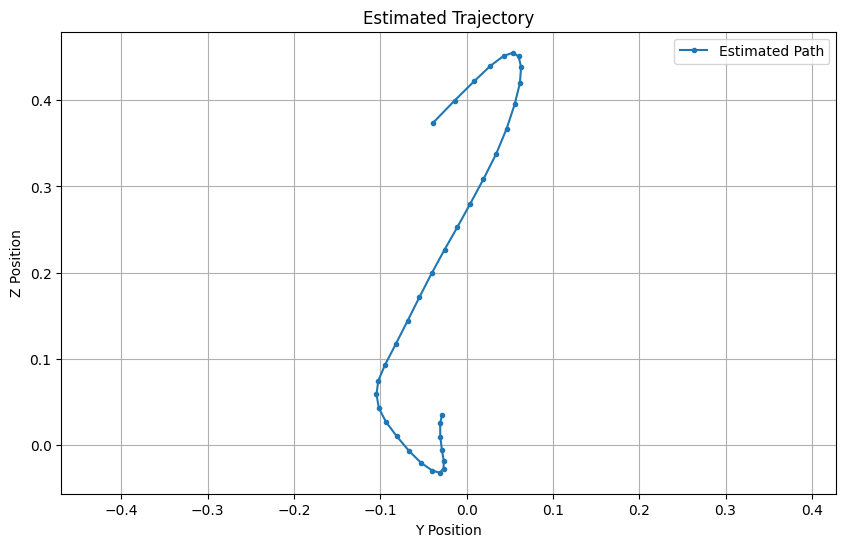

"\n\n\n# Extracting relative Y and Z coordinates for plotting\nrelative_y_coords = relative_positions[:, 0]\nrelative_z_coords = relative_positions[:, 1]\n\n# Plotting the trajectory\nplt.figure(figsize=(10, 6))\nplt.plot(relative_y_coords, relative_z_coords, marker='o', linestyle='-', markersize=3, label='Estimated Path')\nplt.title('Estimated Trajectory (Relative Movements)')\nplt.xlabel('Relative Y Position')\nplt.ylabel('Relative Z Position')\nplt.legend()\nplt.axis('equal')  # Keep aspect ratio to 1 to prevent distortion\nplt.grid(True)\nplt.show()"

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your DataFrame with accelerometer and gyroscope data
accelerometer_data = df[["aY", "aZ"]].values
gyroscope_data = df[["gX", "gY", "gZ"]].values  # Add gyroscope data if you're using it

# Initialize a list to collect states
collected_states = []

# Run through the loop for measurements, updating the EKF and collecting states
for acc_measurement, gyro_measurement in zip(accelerometer_data, gyroscope_data):
    # Update the EKF with both accelerometer and gyroscope data
    predict_and_update(ekf, acc_measurement, gyro_measurement, dt)
    collected_states.append(ekf.x.copy())  # Collect each updated state

# Convert the list of collected states to a NumPy array for easy handling
states = np.array(collected_states[4:40])
# Calculate the starting point (first point of the trajectory)
'''start_point = states[0, :]

# Subtract the starting point from all points to get relative positions
relative_positions = states - start_point'''

# Extract x and y coordinates for plotting
y_coords = states[:, 0]
z_coords = states[:, 1]

# Plotting the trajectory outside the loop, after all measurements have been processed
plt.figure(figsize=(10, 6))
plt.plot(y_coords, z_coords, marker='o', linestyle='-', markersize=3, label='Estimated Path')
plt.title('Estimated Trajectory')
plt.xlabel('Y Position')
plt.ylabel('Z Position')
plt.legend()
plt.axis('equal')
plt.grid(True)
#plt.gca().invert_yaxis()
#plt.gca().invert_xaxis()
plt.show()

'''


# Extracting relative Y and Z coordinates for plotting
relative_y_coords = relative_positions[:, 0]
relative_z_coords = relative_positions[:, 1]

# Plotting the trajectory
plt.figure(figsize=(10, 6))
plt.plot(relative_y_coords, relative_z_coords, marker='o', linestyle='-', markersize=3, label='Estimated Path')
plt.title('Estimated Trajectory (Relative Movements)')
plt.xlabel('Relative Y Position')
plt.ylabel('Relative Z Position')
plt.legend()
plt.axis('equal')  # Keep aspect ratio to 1 to prevent distortion
plt.grid(True)
plt.show()'''




In [ ]:
df.head()
df[:50]

,aX,aY,aZ,gX,gY,gZ
0,0.138,-0.204,2.123,78.735,28.259,-19.714
1,0.150,-0.219,2.018,59.692,5.493,-18.066
2,0.178,-0.265,1.890,41.504,-14.282,-15.259
3,0.201,-0.335,1.753,29.480,-27.466,-13.733
4,0.216,-0.395,1.629,26.733,-35.278,-15.747
5,0.222,-0.418,1.543,33.813,-36.926,-21.545
6,0.201,-0.413,1.507,48.462,-33.630,-30.273
7,0.185,-0.371,1.488,67.078,-28.503,-40.283
8,0.162,-0.296,1.483,86.304,-22.522,-49.622
9,0.144,-0.208,1.508,101.624,-15.747,-56.946


In [ ]:
states=ekf.x
states

array([-1.88659973e+03,  1.03233152e+03, -3.24700503e+00,  1.87847529e+00,
        7.10646801e+00,  1.55440720e+01, -9.66005692e+01])